In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA

In [3]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.duplicated().sum()

0

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

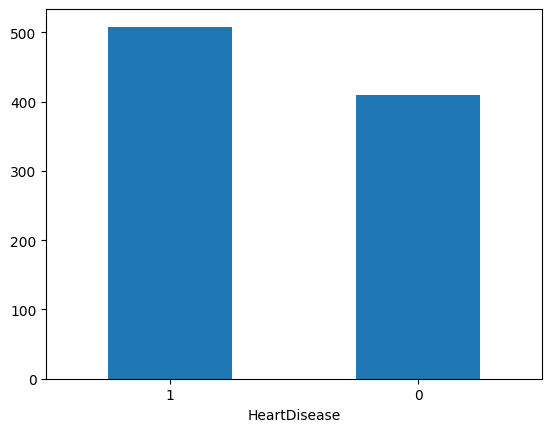

In [8]:
df['HeartDisease'].value_counts().plot(kind="bar")
plt.xticks(rotation=360)

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

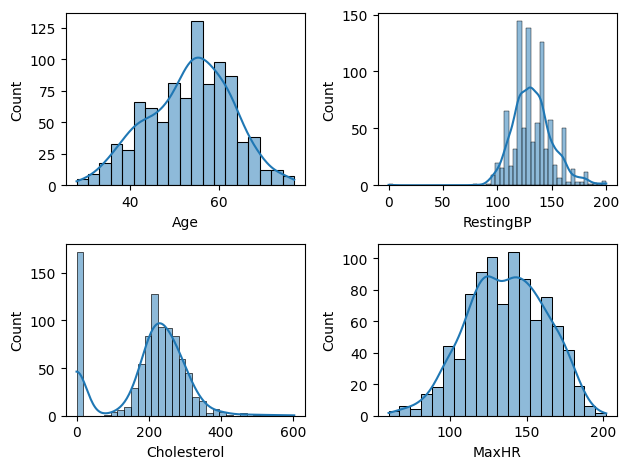

In [10]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()

In [11]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [12]:
def replace_mean(col):
    mean = col[col != 0].mean().round(2)
    return col.replace(0, mean)

columns = ['Cholesterol', 'RestingBP']
df[columns] = df[columns].apply(replace_mean)


In [13]:
df['RestingBP'].value_counts()

RestingBP
120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
185.0      1
98.0       1
92.0       1
113.0      1
164.0      1
Name: count, Length: 67, dtype: int64

In [14]:
!pip install sheryanalysis==0.1.0

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [15]:
import sheryanalysis as sh

In [16]:
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

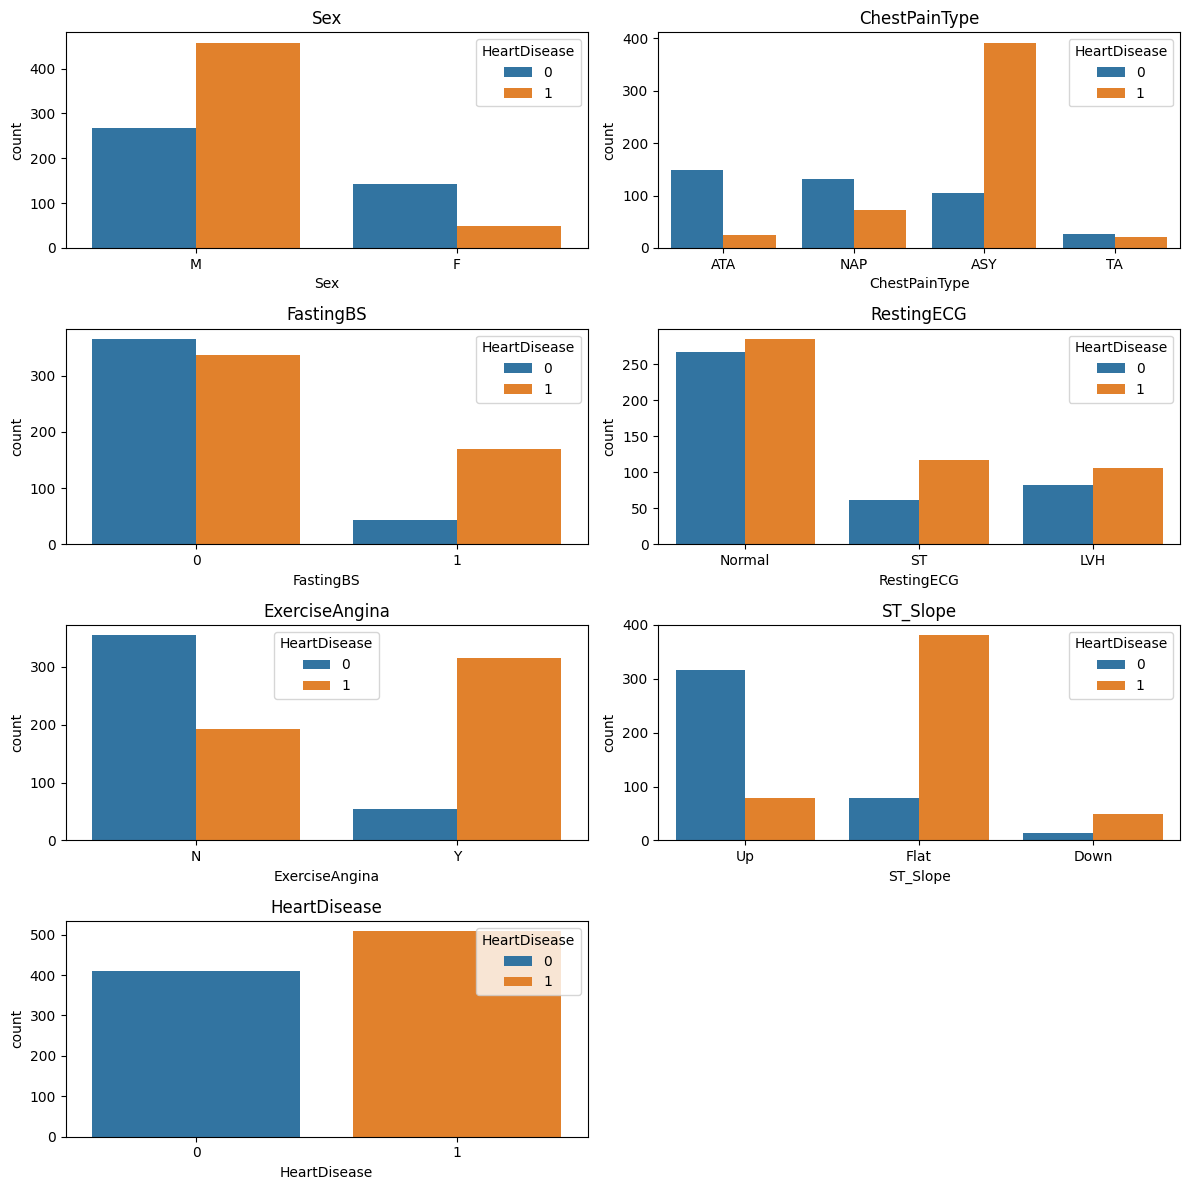

In [17]:
cat_column=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']
def countPlot(columns):
    plt.figure(figsize=(12, 12))
    for i, col in enumerate(columns):
        plt.subplot(4, 2, i + 1)
        sns.countplot(x=df[col],hue=df['HeartDisease'])
        plt.title(col)
    plt.tight_layout()
    plt.show()                     
countPlot(cat_column)

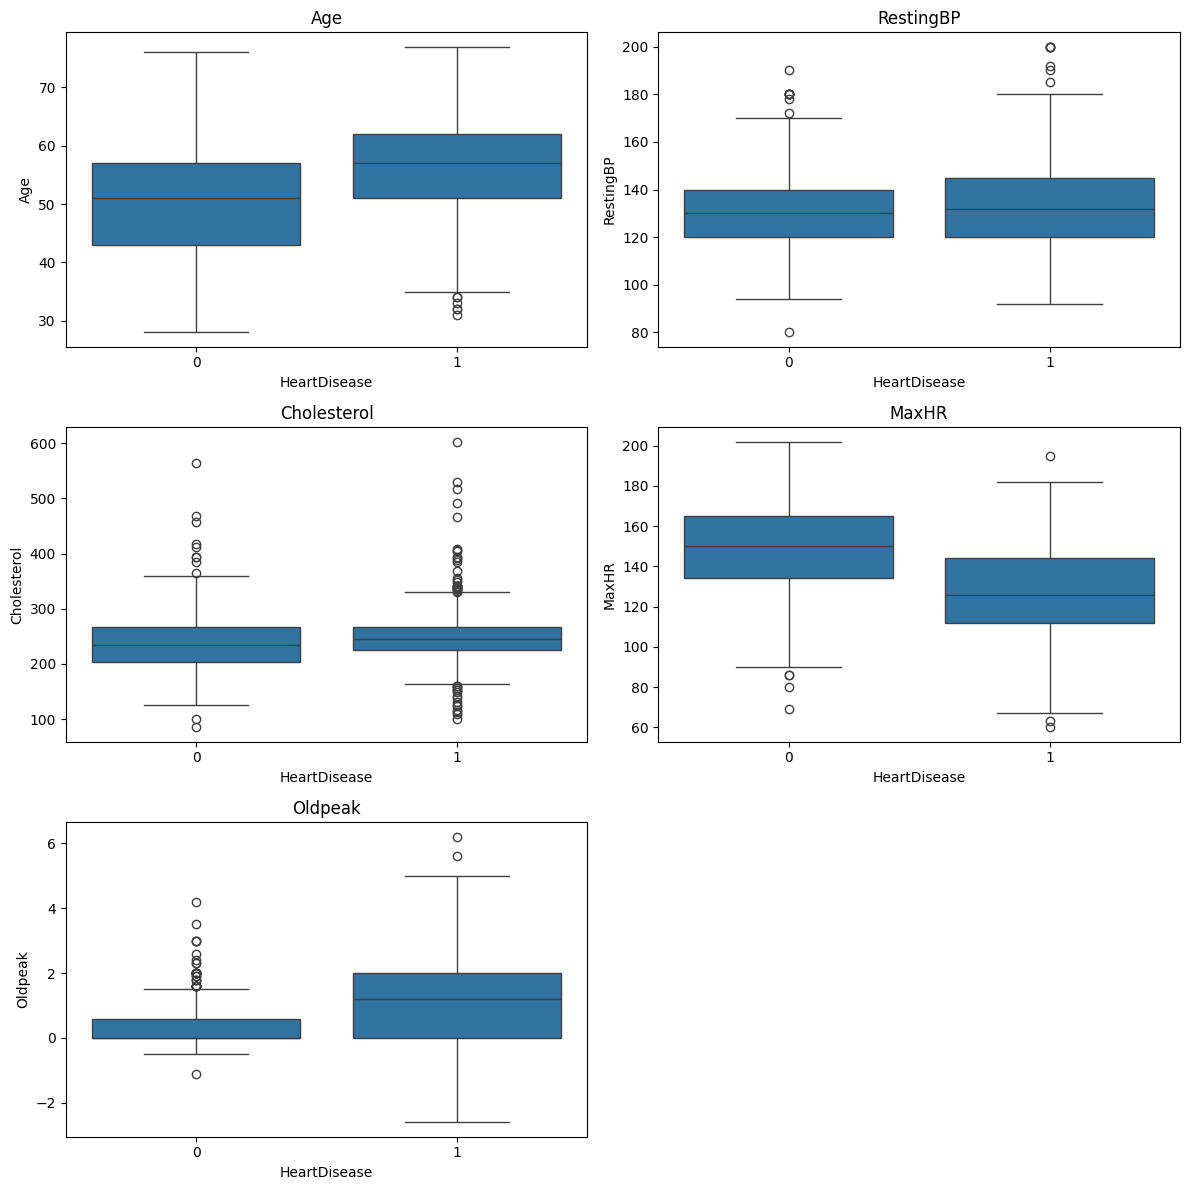

In [18]:
num_col=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
num_col=[i.strip() for i in num_col]
def Boxplot(columns):
    plt.figure(figsize=(12, 12))
    for i, col in enumerate(columns):
        plt.subplot(3, 2, i + 1)
        sns.boxplot(y=df[col],x=df['HeartDisease'])
        plt.title(col)
    plt.tight_layout()
    plt.show()                     
Boxplot(num_col)

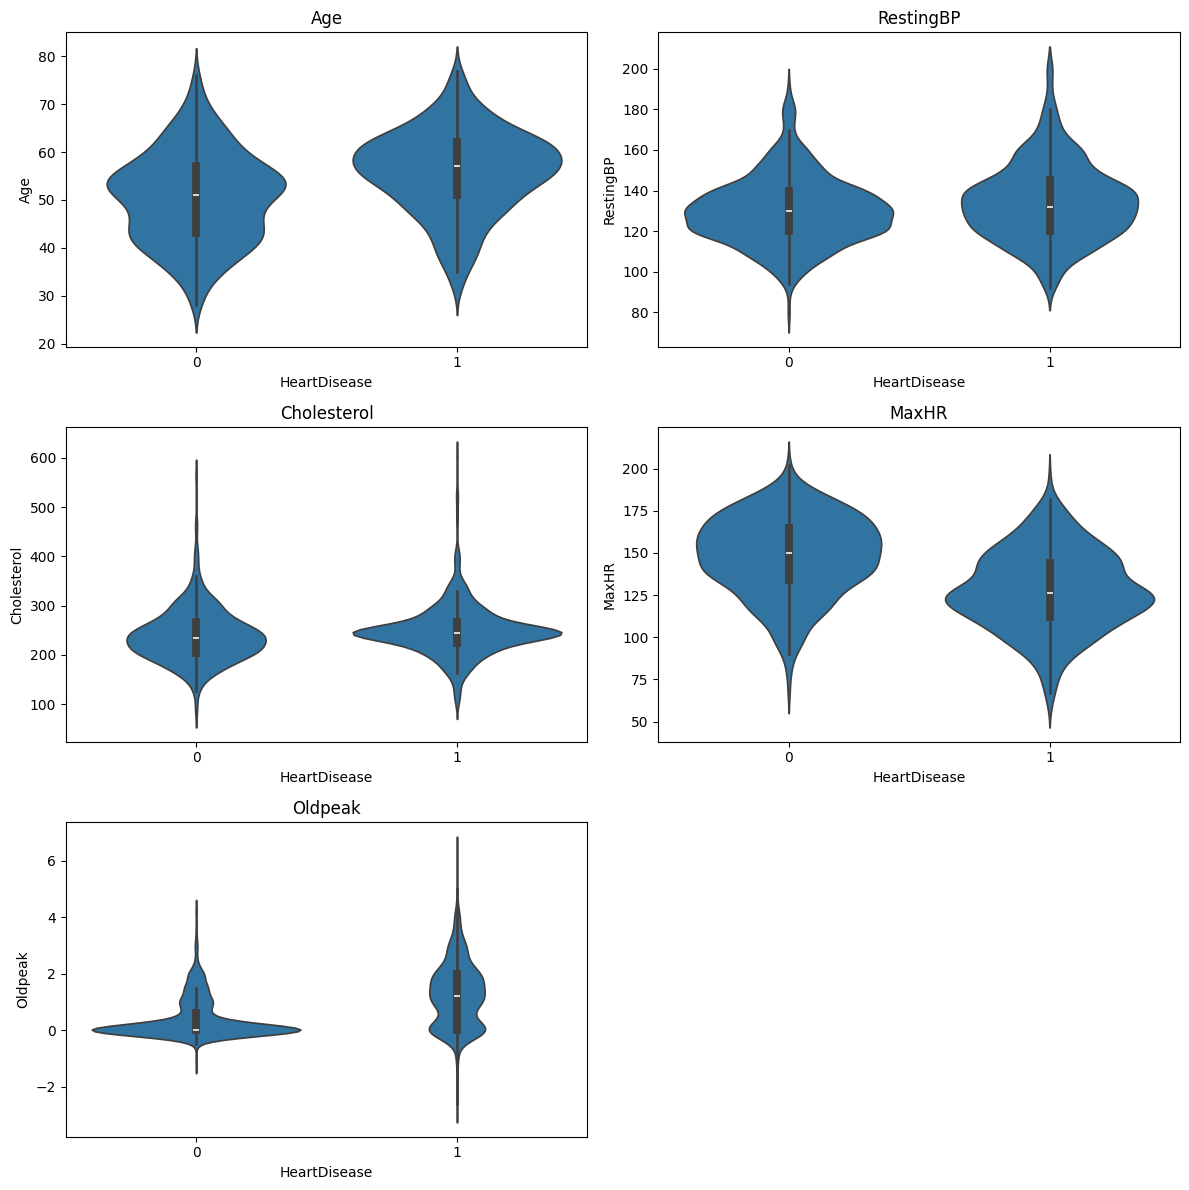

In [19]:
num_col=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
num_col=[i.strip() for i in num_col]
def Violinplot(columns):
    plt.figure(figsize=(12, 12))
    for i, col in enumerate(columns):
        plt.subplot(3, 2, i + 1)
        sns.violinplot(y=df[col],x=df['HeartDisease'])
        plt.title(col)
    plt.tight_layout()
    plt.show()                     
Violinplot(num_col)

<Axes: >

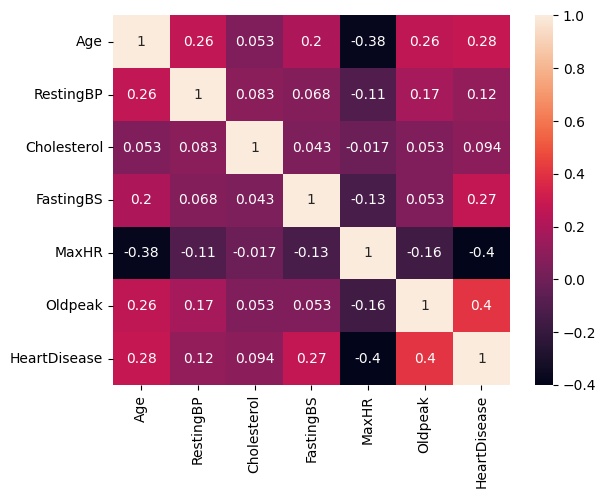

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data preprocessing and cleaning

In [21]:
df_encode = pd.get_dummies(df, drop_first=True, dtype=int)


In [22]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [23]:
df_encode.shape[1]

16

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score


In [25]:
x=df_encode.drop('HeartDisease',axis=1)
x.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [26]:
y=df_encode['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
795,42,120.0,240.00,1,194,0.8,1,0,1,0,1,0,0,0,0
25,36,130.0,209.00,0,178,0.0,1,0,1,0,1,0,0,0,1
84,56,150.0,213.00,1,125,1.0,1,0,0,0,1,0,1,1,0
10,37,130.0,211.00,0,142,0.0,0,0,1,0,1,0,0,0,1
344,51,120.0,244.64,1,104,0.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,120.0,254.00,0,110,0.0,0,0,0,0,0,1,0,0,1
270,45,120.0,225.00,0,140,0.0,1,0,0,0,1,0,0,0,1
860,60,130.0,253.00,0,144,1.4,1,0,0,0,1,0,1,0,1
435,60,152.0,244.64,0,118,0.0,1,0,0,0,0,1,1,0,1


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
y_train

795    0
25     0
84     1
10     0
344    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 734, dtype: int64

In [31]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
795,42,120.0,240.00,1,194,0.8,1,0,1,0,1,0,0,0,0
25,36,130.0,209.00,0,178,0.0,1,0,1,0,1,0,0,0,1
84,56,150.0,213.00,1,125,1.0,1,0,0,0,1,0,1,1,0
10,37,130.0,211.00,0,142,0.0,0,0,1,0,1,0,0,0,1
344,51,120.0,244.64,1,104,0.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,120.0,254.00,0,110,0.0,0,0,0,0,0,1,0,0,1
270,45,120.0,225.00,0,140,0.0,1,0,0,0,1,0,0,0,1
860,60,130.0,253.00,0,144,1.4,1,0,0,0,1,0,1,0,1
435,60,152.0,244.64,0,118,0.0,1,0,0,0,0,1,1,0,1


In [32]:
models={
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Naive Bayes':GaussianNB(),
    'Decision tree':DecisionTreeClassifier(random_state=42),
    'SVM':SVC(kernel='rbf')
}
result=[]
for name ,model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred=model.predict(x_test_scaled)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    result.append({
        'model':name,
        'Accuracy':acc,
        'f1_score':f1 
    })

In [33]:
for res in result:
    for key,value in res.items():
        print(f"{key} : {value}",end=" ")
    print()

model : Logistic Regression Accuracy : 0.8641304347826086 f1_score : 0.8792270531400966 
model : KNN Accuracy : 0.8532608695652174 f1_score : 0.8708133971291866 
model : Naive Bayes Accuracy : 0.8478260869565217 f1_score : 0.8613861386138614 
model : Decision tree Accuracy : 0.8206521739130435 f1_score : 0.8374384236453202 
model : SVM Accuracy : 0.8586956521739131 f1_score : 0.8761904761904762 


In [35]:
import joblib
joblib.dump(models['Logistic Regression'],'Logistic_regression_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(x.columns.tolist(),'columns.pkl')


['columns.pkl']

In [36]:
import os
os.listdir()


['.ipynb_checkpoints',
 'car price prediction.ipynb',
 'columns.pkl',
 'ford (1).csv',
 'heart.csv',
 'heart.ipynb',
 'insurance.csv',
 'insurance.ipynb',
 'Logistic_regression_heart.pkl',
 'scaler.pkl',
 'titanic.ipynb']

In [37]:
x.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
#ValueError: The feature names should match those that were passed during fit. Feature names unseen at fit time: - ChestPainType_ATA - ChestPainType_NAP - ChestPainType_TA - ExerciseAngina_Y - FastingBS - ...